<a href="https://colab.research.google.com/github/cheth-dev/Mainflow_internship/blob/main/TASK4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing Values:
 Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    0
dtype: int64


<ipython-input-3-51c3694aeb94>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Brick'].fillna(df['Brick'].mode()[0], inplace=True)
<ipython-input-3-51c3694aeb94>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

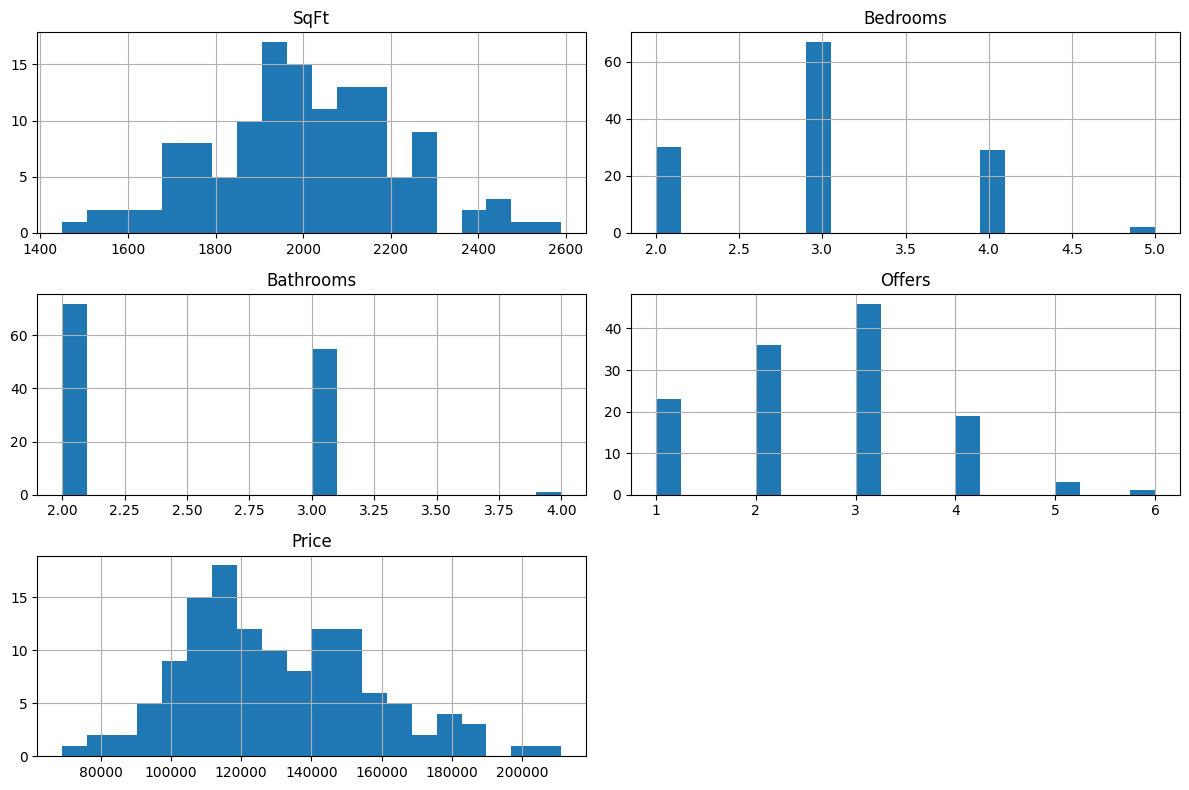

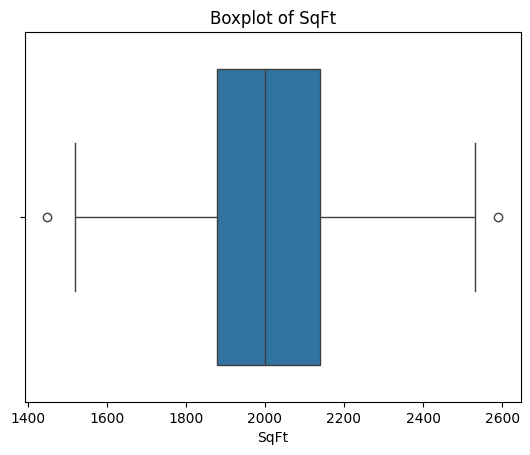

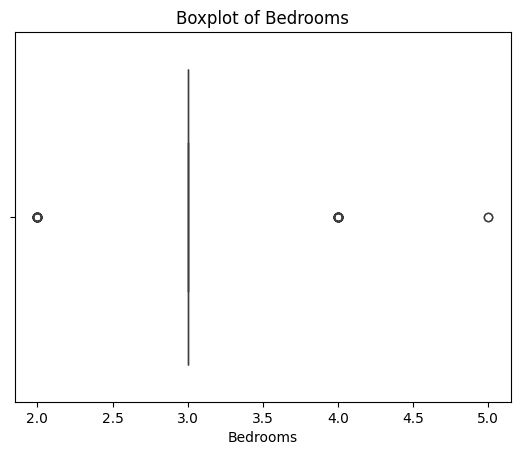

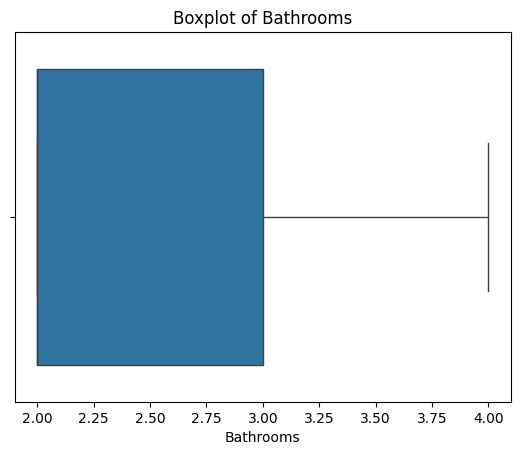

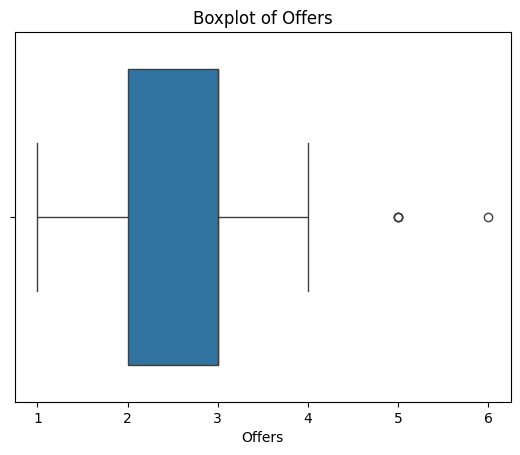

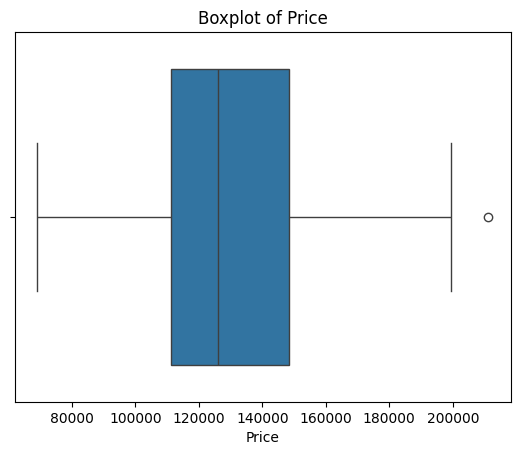

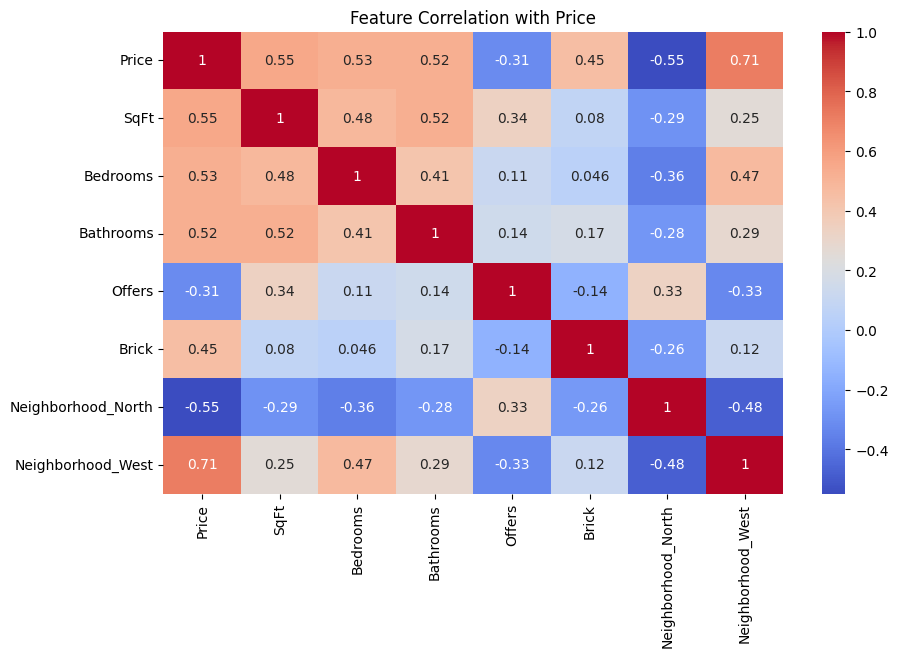


Correlation with Price:
 Price                 1.000000
Neighborhood_West     0.714007
SqFt                  0.552982
Bedrooms              0.525926
Bathrooms             0.523258
Brick                 0.452817
Offers               -0.313636
Neighborhood_North   -0.548221
Name: Price, dtype: float64

RMSE: 114170418.45
R² Score: 0.81


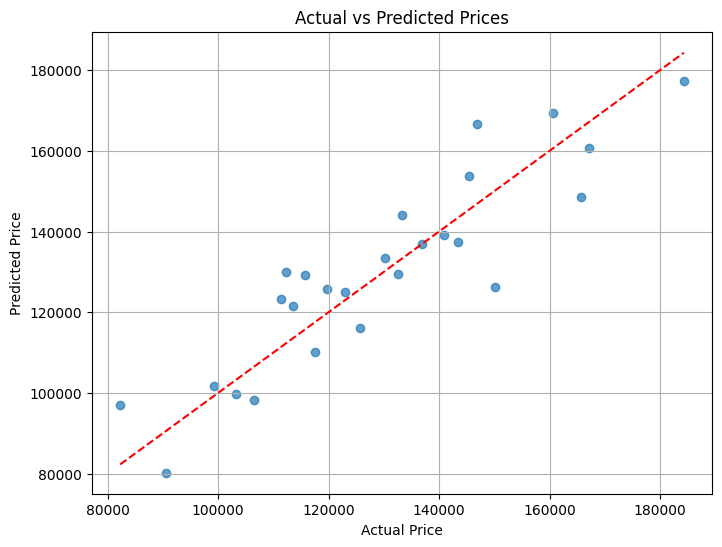


Feature Importance:
 Neighborhood_West     22087.495193
Brick                 16781.709101
SqFt                  12533.747450
Offers                -9108.809987
Bathrooms              3569.446037
Bedrooms               2668.833763
Neighborhood_North     1469.269051
dtype: float64


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('/content/house-prices.csv')

# Drop 'Home' column
df.drop(columns=['Home'], inplace=True)

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Handle missing values
df.fillna(df.median(numeric_only=True), inplace=True)
df['Brick'].fillna(df['Brick'].mode()[0], inplace=True)
df['Neighborhood'].fillna(df['Neighborhood'].mode()[0], inplace=True)

# Analyze distributions
df[['SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Price']].hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

# Outliers
for col in ['SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Price']:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Convert 'Brick' to binary
df['Brick'] = df['Brick'].map({'Yes': 1, 'No': 0})

# One-Hot Encode 'Neighborhood'
df = pd.get_dummies(df, columns=['Neighborhood'], drop_first=True)

# Normalize numeric features
scaler = StandardScaler()
df[['SqFt', 'Bedrooms', 'Bathrooms', 'Offers']] = scaler.fit_transform(df[['SqFt', 'Bedrooms', 'Bathrooms', 'Offers']])

# Correlation analysis
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation with Price')
plt.show()

print("\nCorrelation with Price:\n", df.corr()['Price'].sort_values(ascending=False))

# Define X and y
X = df.drop('Price', axis=1)
y = df['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nRMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.show()

# Feature Importance
coefficients = pd.Series(model.coef_, index=X.columns).sort_values(key=abs, ascending=False)
print("\nFeature Importance:\n", coefficients)
